# MathAData - Géométrie : Droite et produit scalaire

## Classification des images de 2 et de 7

!!! abstract But du TP  
Dans ce Notebook, nous allons construire un algorithme qui prédit si un 2 ou un 7 est écrit sur une image.  
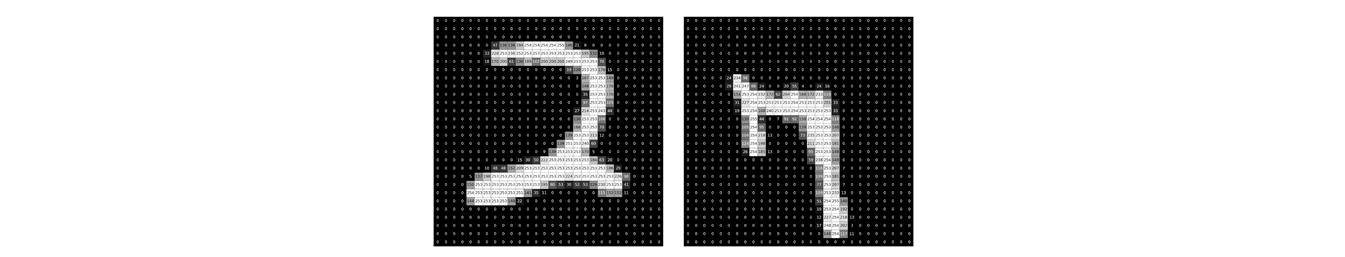  
!!!

!!! tip Exécuter une cellule  
Pour commencer, cliquez sur la cellule de code ci-dessous puis appuyez sur le bouton <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">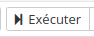</span> ou les touches <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span>.  
Lorsque le code aura été executé, un nombre apparaîtra entre les crochets sur la gauche : <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span>  
!!!
!!! warning  SOS <details><summary>  
   Rien ne se passe ? Clique ici  </summary>   
Possibilité 1 : Ci-dessous tu vois :<span style="display: inline-block; margin: auto 1rem; vertical-align: middle">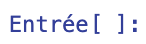</span> : Clique bien dans la cellule ci-dessous puis exécute.   
Possibilité 2 :  Tu vois bien ceci <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span> (le numéro entre crochet peut être autre) mais la suite ne s'affiche pas ?   
Cliquez sur le bouton **deux petites flèches**<span style="display: inline-block; margin: auto 1rem; vertical-align: middle">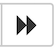</span>sur la barre d'outils en haut du notebook.  
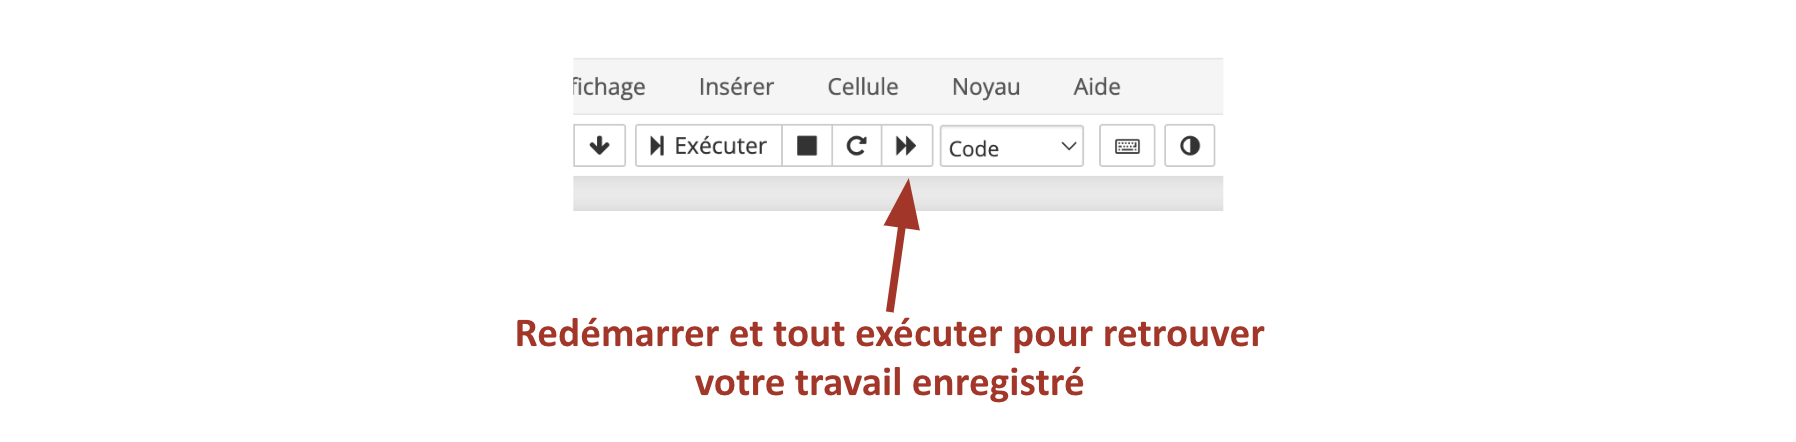.</details>  
!!!

In [ ]:
from utilitaires_mnist import *
from utilitaires_P_GEO_droite_produit_scalaire import *

!!! tip Base de donnée  
Nous avons environ 6 000 images.  
**Exécutez la cellule suivante** pour afficher la base de donnée. Vous pouvez cliquer sur une ligne pour afficher {data('le')} correspondant{e_fem()} et vous déplacer avec les flèches haut et bas du clavier.  
!!!

In [ ]:
affichage_banque()

validation_execution()

!!! question Combien d'images de 7 y a-t-il parmi les 10 premières images ?  
 **Remplacez les `...`** dans la cellule suivante par votre réponse **puis exécutez**.  
!!!

In [ ]:
nombre_7 = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_nombre()

!!! question Combien d'images contient la base de données au total ?   
 **Remplacez les `...`** dans la cellule suivante par votre réponse **puis exécutez**.  
!!!

In [ ]:
nombre_total_images = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_nombre_total()

## Point de départ

!!! tip Fonctionnement d'un algorithme  
Un algorithme reçoit une donnée, effectue des opérations, et donne une réponse.  
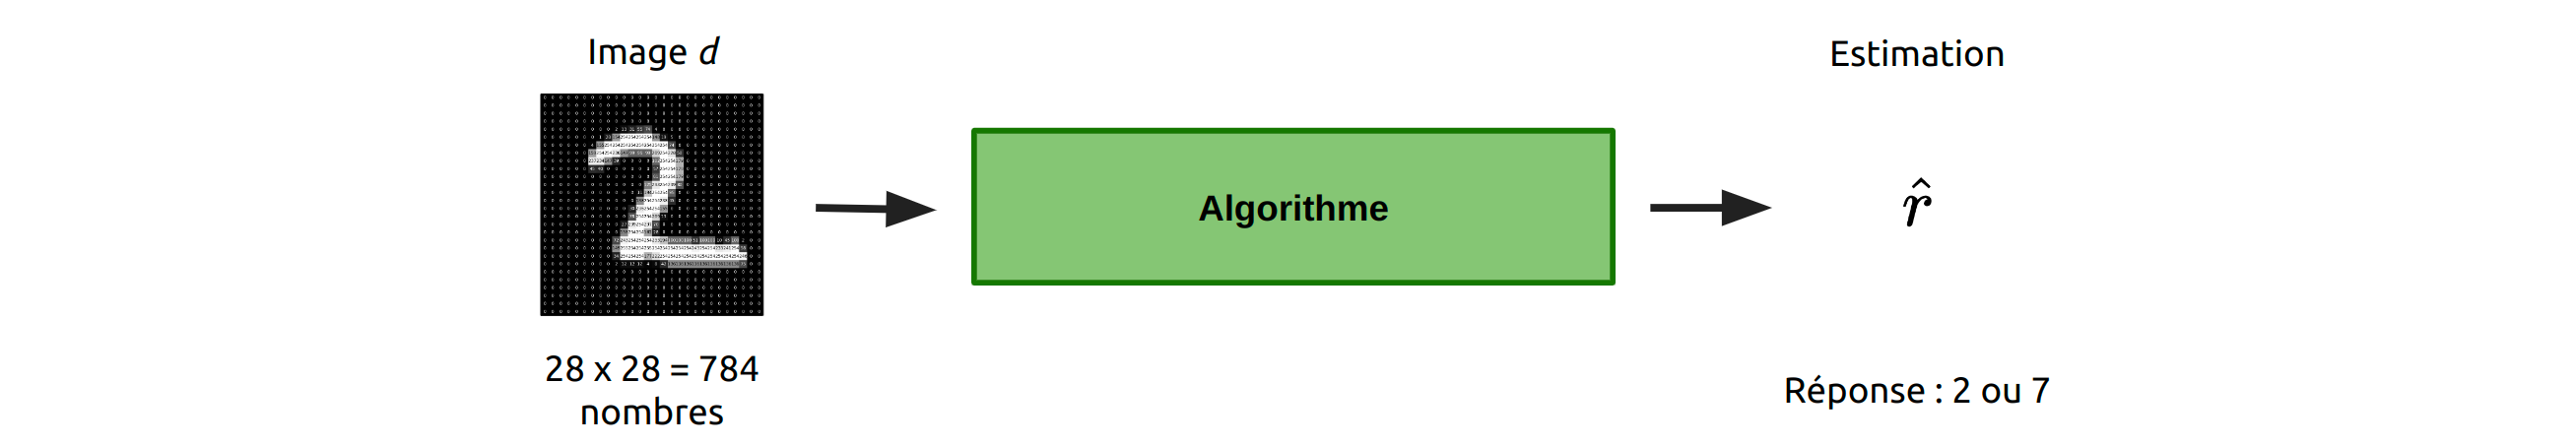  
!!!
!!! abstract Algorithme fainéant : Renvoyer toujours 2.   
LucIA ne veut pas se fatiguer et propose un algorithme très simple **qui renvoie toujours 2**.  
!!!

In [ ]:
import utilitaires_common

def algorithme(d):
    return 2

validation_execution_algo_fixe()

!!! question Que répond l'algorithme fainéant pour ces trois images ?  
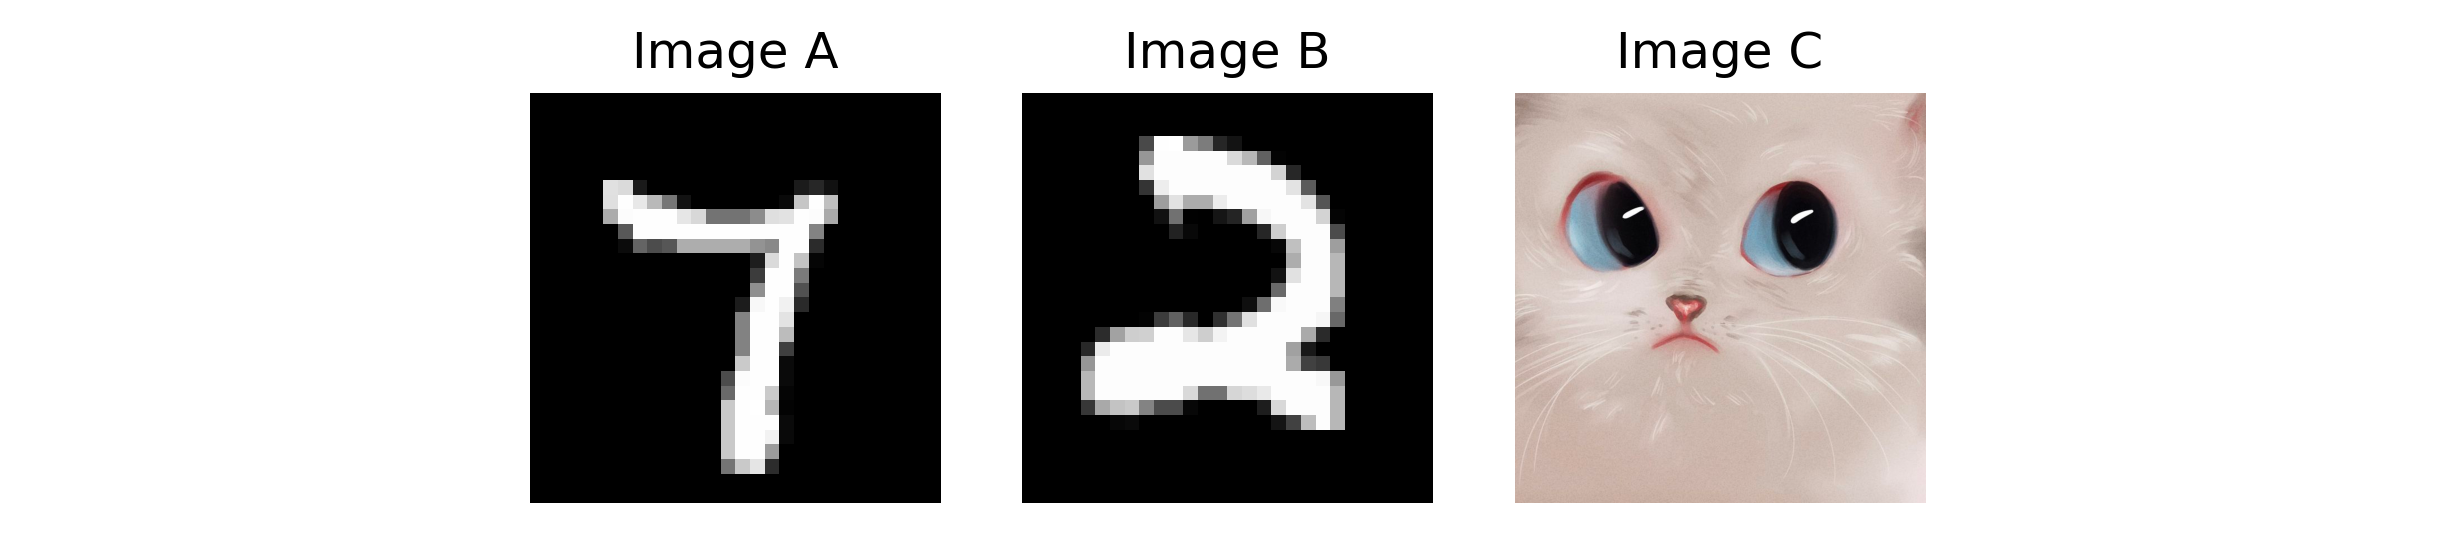  
**Remplacez les `...`** dans la cellule suivante par votre réponse  **puis exécutez**.  
!!!

In [ ]:
Reponse_Image_A = ...
Reponse_Image_B = ...
Reponse_Image_C = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_faineant()

!!! info Le pourcentage d'erreur : un moyen d'évaluer votre algorithme  
Plus le pourcentage d'erreur de votre algorithme est bas meilleur est votre solution.  
  
$$\text{erreur} = \frac{\text{Nombre d'images mal classées}} {\text{Nombre total d'images}} \times 100.$$  
Une image mal classée est une image pour laquelle l'algorithme a donné une prédiction différente de la vraie classe de l'image:  
$$\hat r \neq r.$$  
!!!


In [ ]:
affichage_banque(showPredictions=True)

validation_execution_calcul_score()

!!! question Quel est le pourcentage d'erreur de l'algorithme sur les 10 premières images ?  
Calculez le pourcentage d'erreur de l'algorithme sur les 10 premières images.  
**Remplacez les `...`** dans la cellule suivante par votre réponse (uniquement le nombre sans le %) **puis exécutez**.  
!!!

In [ ]:
erreur_10 = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_score_fixe()

!!! tip Taux d'erreur sur toutes les images  
**Exécutez la cellule suivante** pour calculer le pourcentage d'erreur sur l'ensemble des 6 000 images.  
!!!

In [ ]:
calculer_score_etape_1()

## Image numérique

!!! abstract Qu'est ce qu'une image ?  
Pour diminuer notre erreur, notre algorithme doit "regarder" l'image. On doit comprendre ce qu'est l'image pour l'ordinateur.  
!!!
!!! tip Calcul sur l'image  
Pour l'ordinateur, une image est un tableau de nombres. Chaque nombre correspond à un pixel de l'image. Chaque pixel vaut entre 0 et 255, 0 pour noir et 255 pour blanc.  
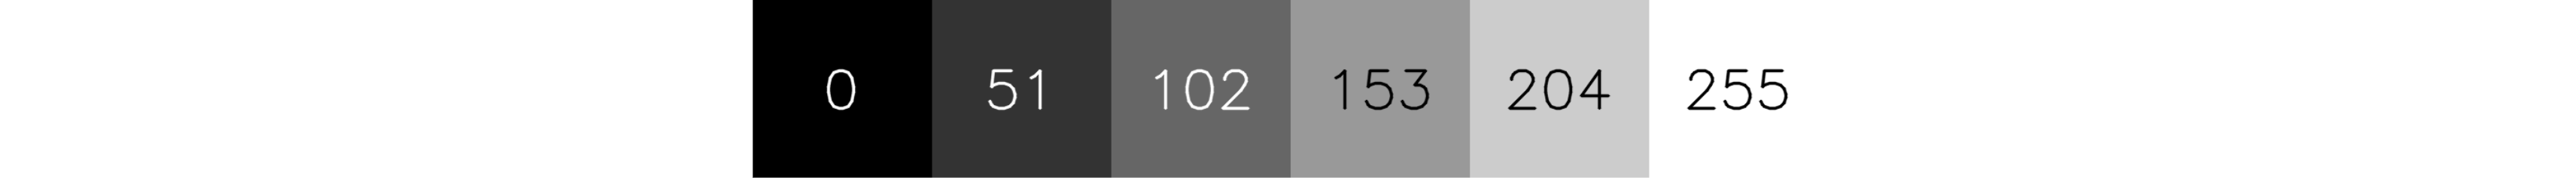  
**Exécutez la cellule suivante pour afficher une image $d$.**  
!!!

In [ ]:
affichage(d)
affichage_tableau(d)

validation_execution_affichage()

!!! question Quelle est la valeur du pixel positionné en ligne 18 et colonne 15 ?  
Lisez dans le tableau la valeur du pixel et complétez sa valeur **à la place des `...`** dans la cellule ci-dessous **puis exécutez**.  
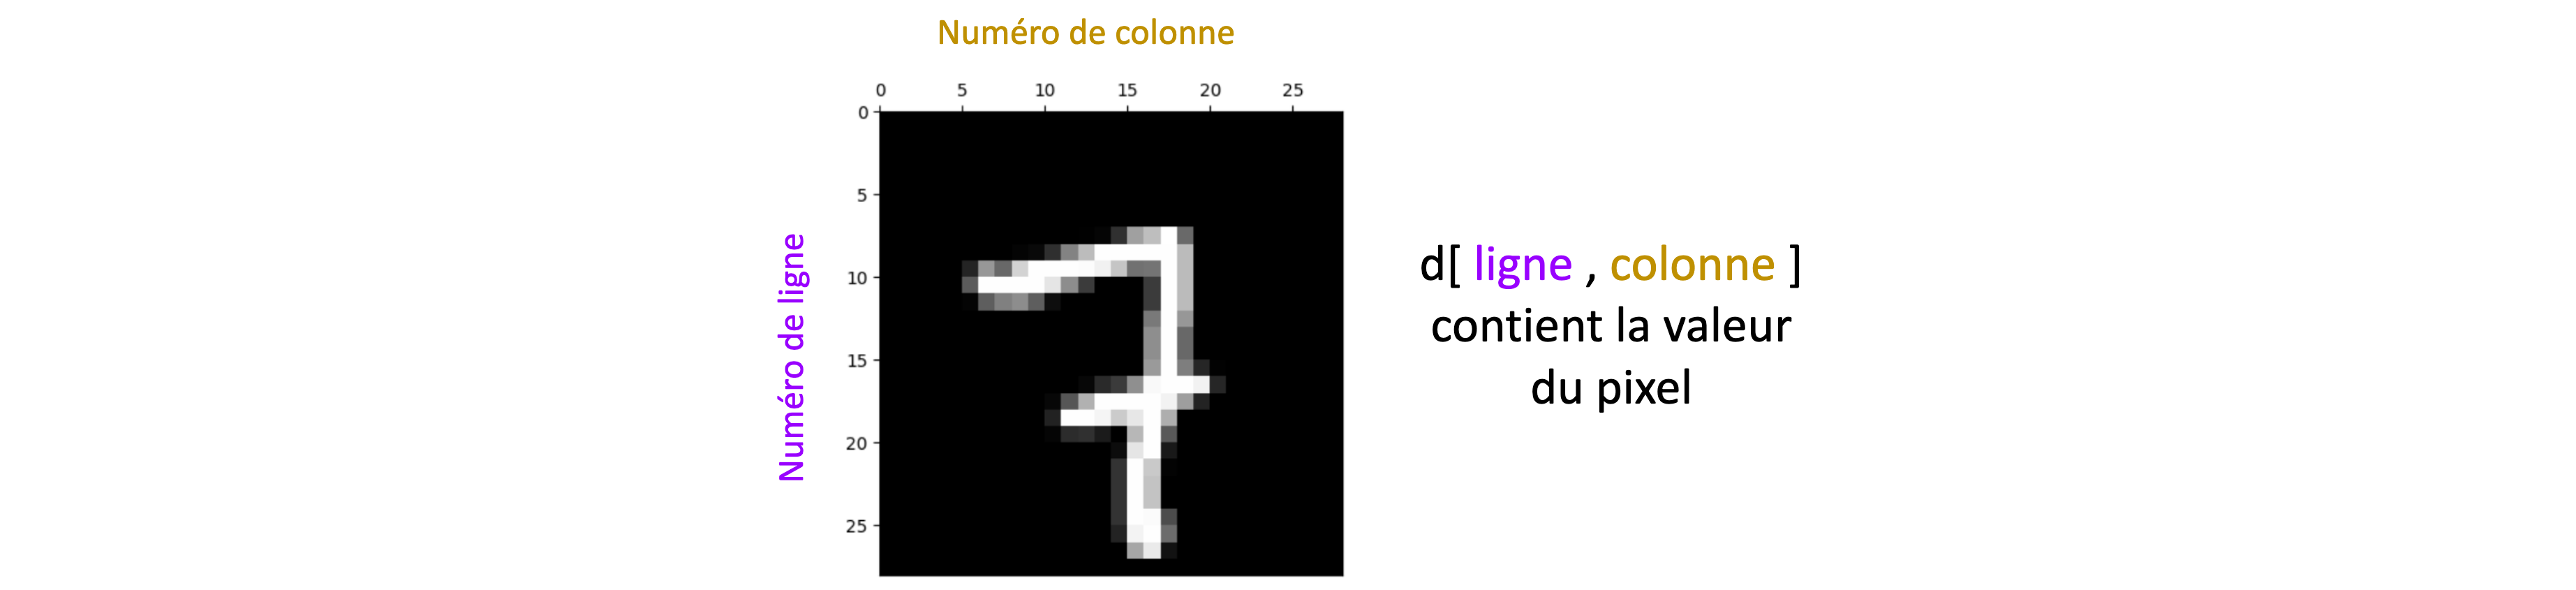  
Remarque : Dans le cas des tableaux python la première coordonnée est le numéro de ligne, la deuxième le numéro de colonne : (ligne,colonne).  
!!!

In [ ]:
pixel = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_pixel()

!!! question Transformez le pixel (17,15) en pixel noir  
**Remplacez ci-dessous les `...`** par la nouvelle valeur à donner au pixel pour qu'il soit noir **puis exécutez**.  
!!!

In [ ]:
d[17,15] = ...

# NE PAS TOUCHER CES LIGNES
validation_question_pixel_noir()
affichage(d,(17,15))
affichage_tableau(d,(17,15))

## Caractéristiques

### Calcul des caractéristiques

!!! tip Caractéristique d'une image  
Pour diminuer notre erreur, notre algorithme doit maintenant utiliser l'image au lieu de répondre au hasard.  
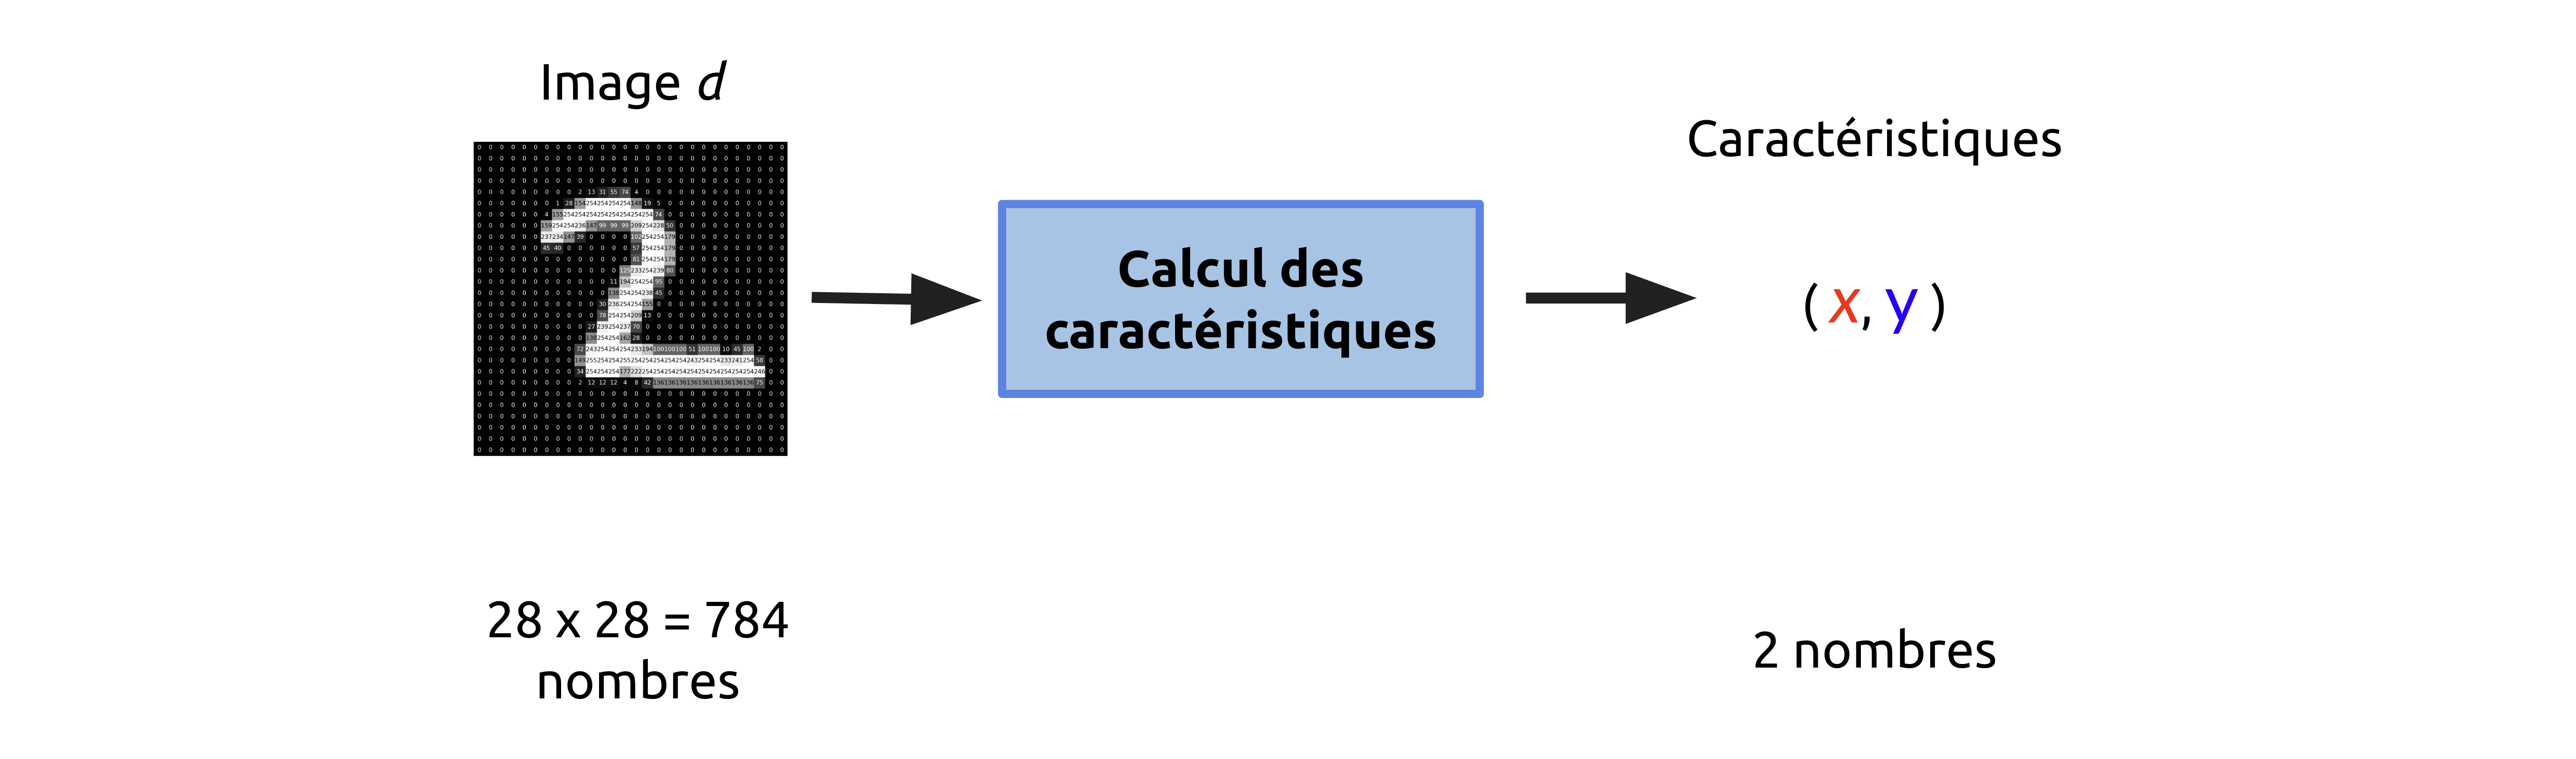  
Les caractéristiques notées $x, y, ...$ permettent de simplifier l'image en gardant peu de nombres.  
!!!

!!! tip La moyenne  
Pour résumer les valeurs de certains pixels en une seule valeur, on fait la moyenne de ces pixels.  
!!!

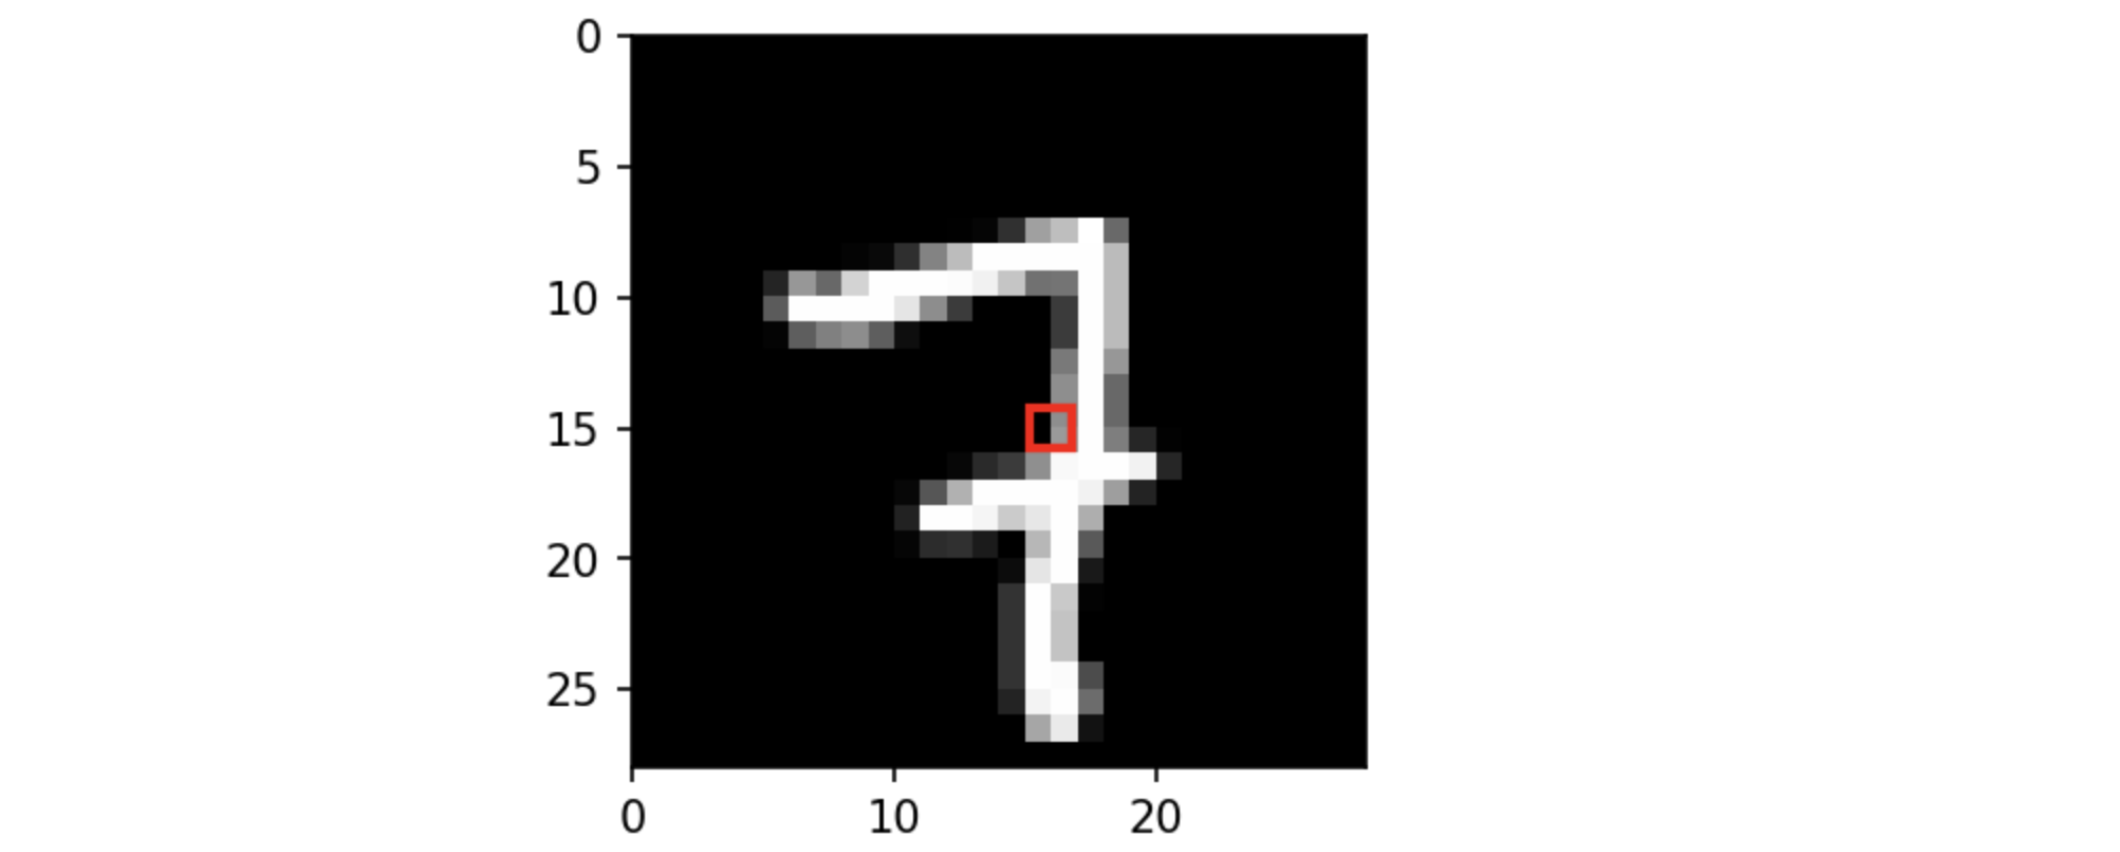  
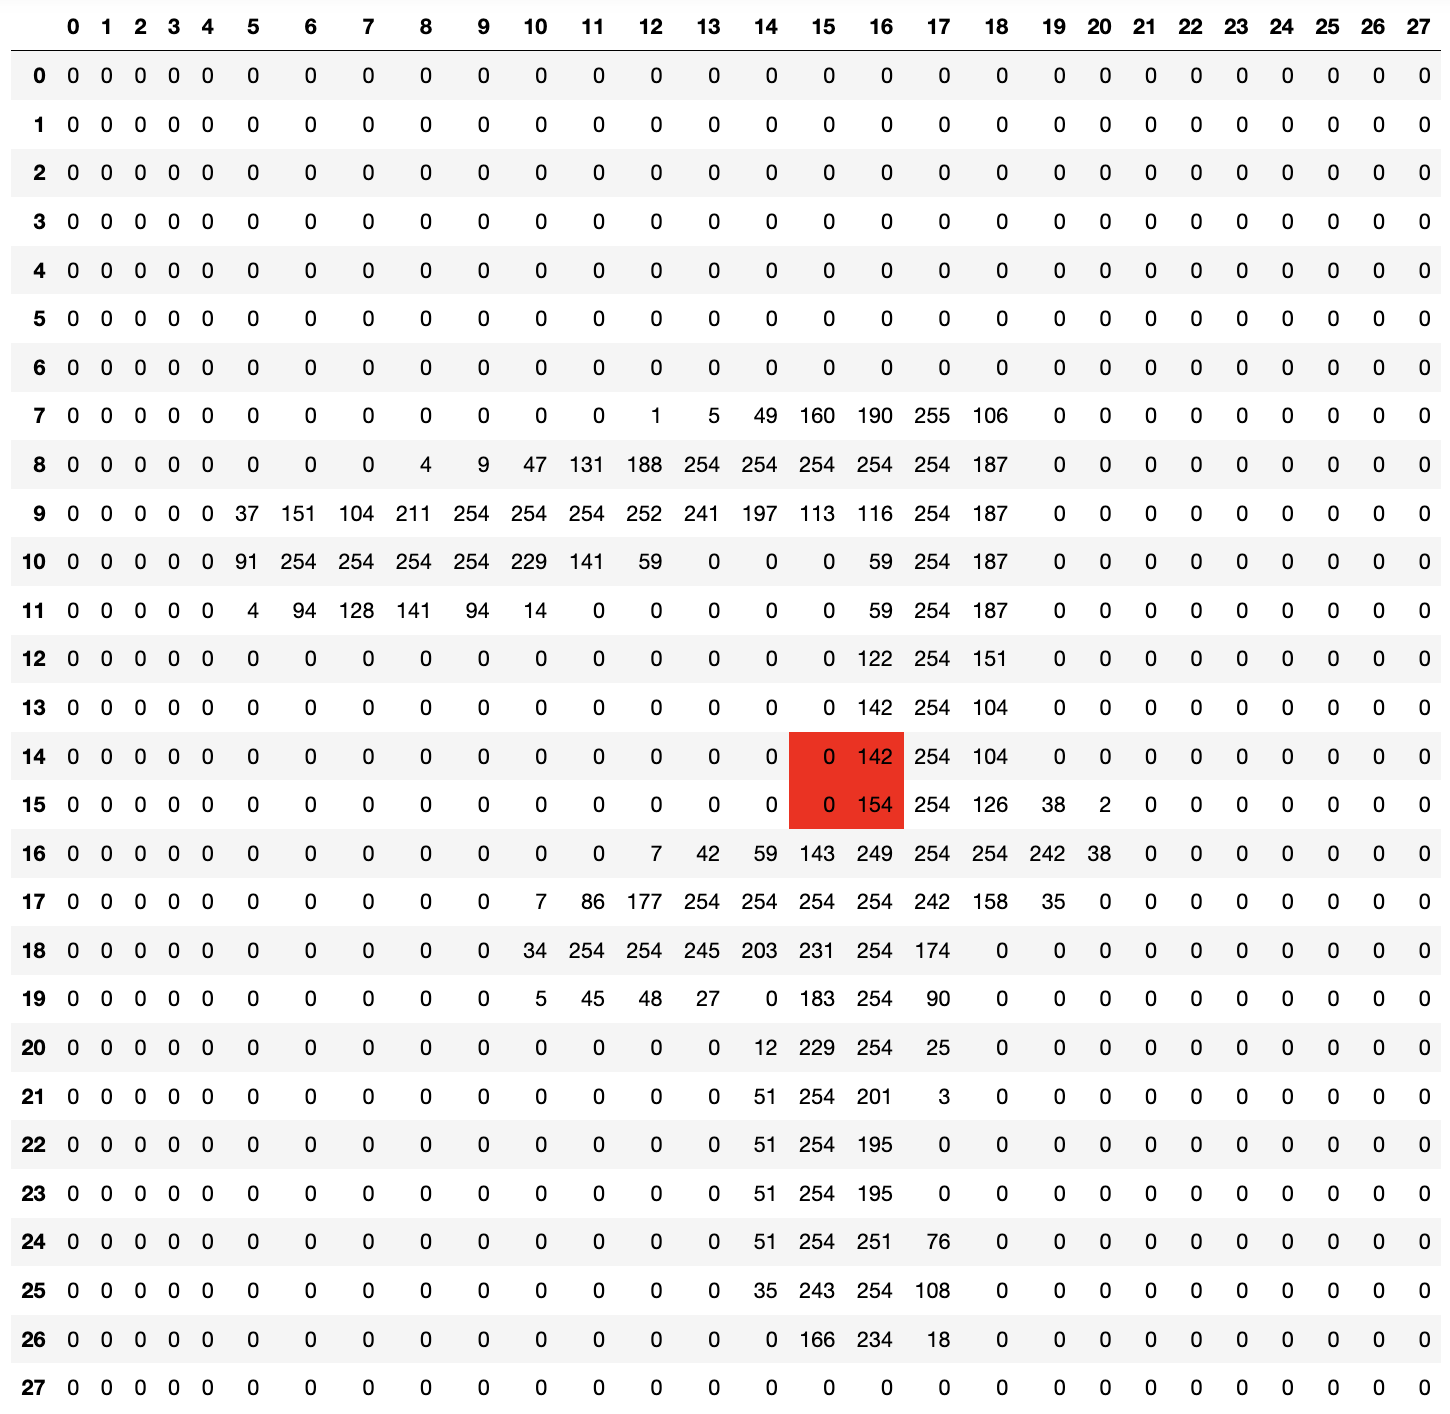
!!! question Calculez la moyenne sur les pixels rouges  
Calculez la moyenne des pixels de la zone surlignée en rouge. Donnez votre réponse **à la place des `...`** dans la cellule ci-dessous **puis exécutez**.  
!!!

In [ ]:
moyenne_zone_4pixels = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_moyenne()

!!! tip Moyenne sur 2 zones différentes  
Nous allons commencer avec deux caractéristiques de référence : la moyenne sur la moitié haute de l'image et la moyenne sur la moitié basse.  
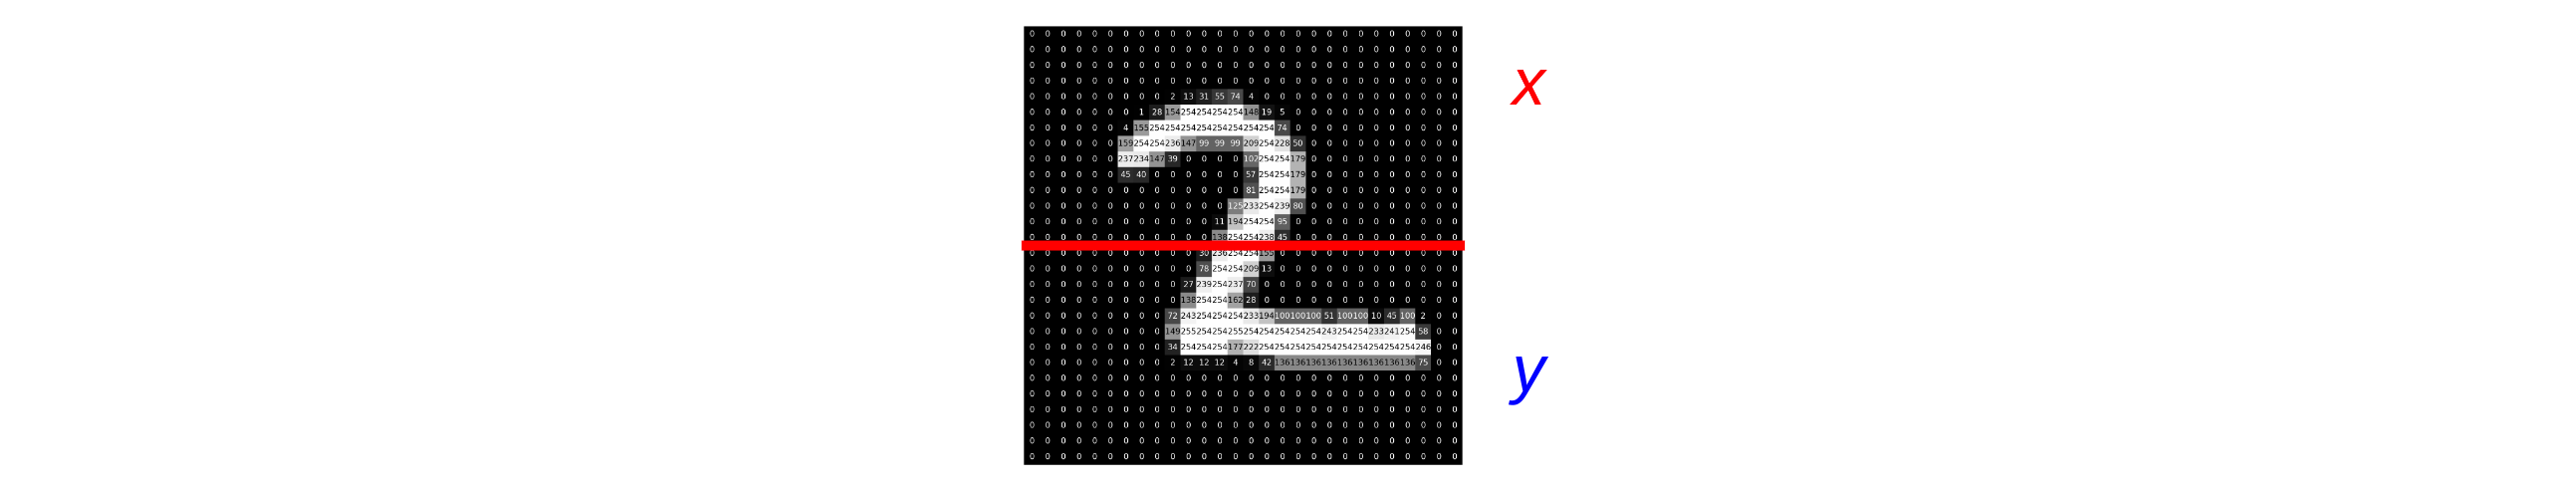  
**Exécutez la cellule suivante** pour voir un exemple.  
!!!

In [ ]:
affichage_2_geo()

validation_execution_2_caracteristiques()

!!! question Quelle image correspond à chaque couple ($x,y$) ?  
On a calculé pour les deux images ci-dessus leurs caractéristiques $(x,y)$. Regardez les deux images et le tableau pour déduire quelle image correspond à chaque couple de moyennes $(x,y)$.  
**Remplacez les `...`** dans la cellule suivante avec 2 et 7 dans le bon ordre **puis exécutez**.  
!!!

In [ ]:
r1 = ...
r2 = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_2_caracteristiques()

### Visualisation dans le plan

!!! info Visualisation dans le plan et nuages de points  
Nous avons maintenant 2 valeurs $(x, y)$ associées à chaque image et nous pouvons placer chacune dans un plan en utilisant x et y comme coordonnées. Nous allons maintenant étudier la répartition dans le plan des 2 et des 7.   
  
Plus notre caractéristique est discriminante, plus on peut observer deux nuages (groupes) de points distincts.  
  
**Exécutez la cellule suivante** pour afficher les points correspondant aux 200 premières images de l'ensemble d'entraînement.  
!!!

In [ ]:
tracer_200_points()
validation_execution_200_points()

!!! question Quel nuage de point correspond à quelle classe d'image ?  
A votre avis, les points de couleur bleue correspondent aux images de 2 ou de 7 ?  
**Remplacez les `...`** dans la cellule suivante avec 2 ou 7 dans le bon ordre **puis exécutez**.  
!!!

In [ ]:
classe_points_bleus = ...
classe_points_oranges = ...

# NE PAS MODIFIER LA LIGNE EN-DESSOUS
validation_question_couleur()

## Classification

!!! info Classification  
La classification est la dernière étape de l'algorithme.  
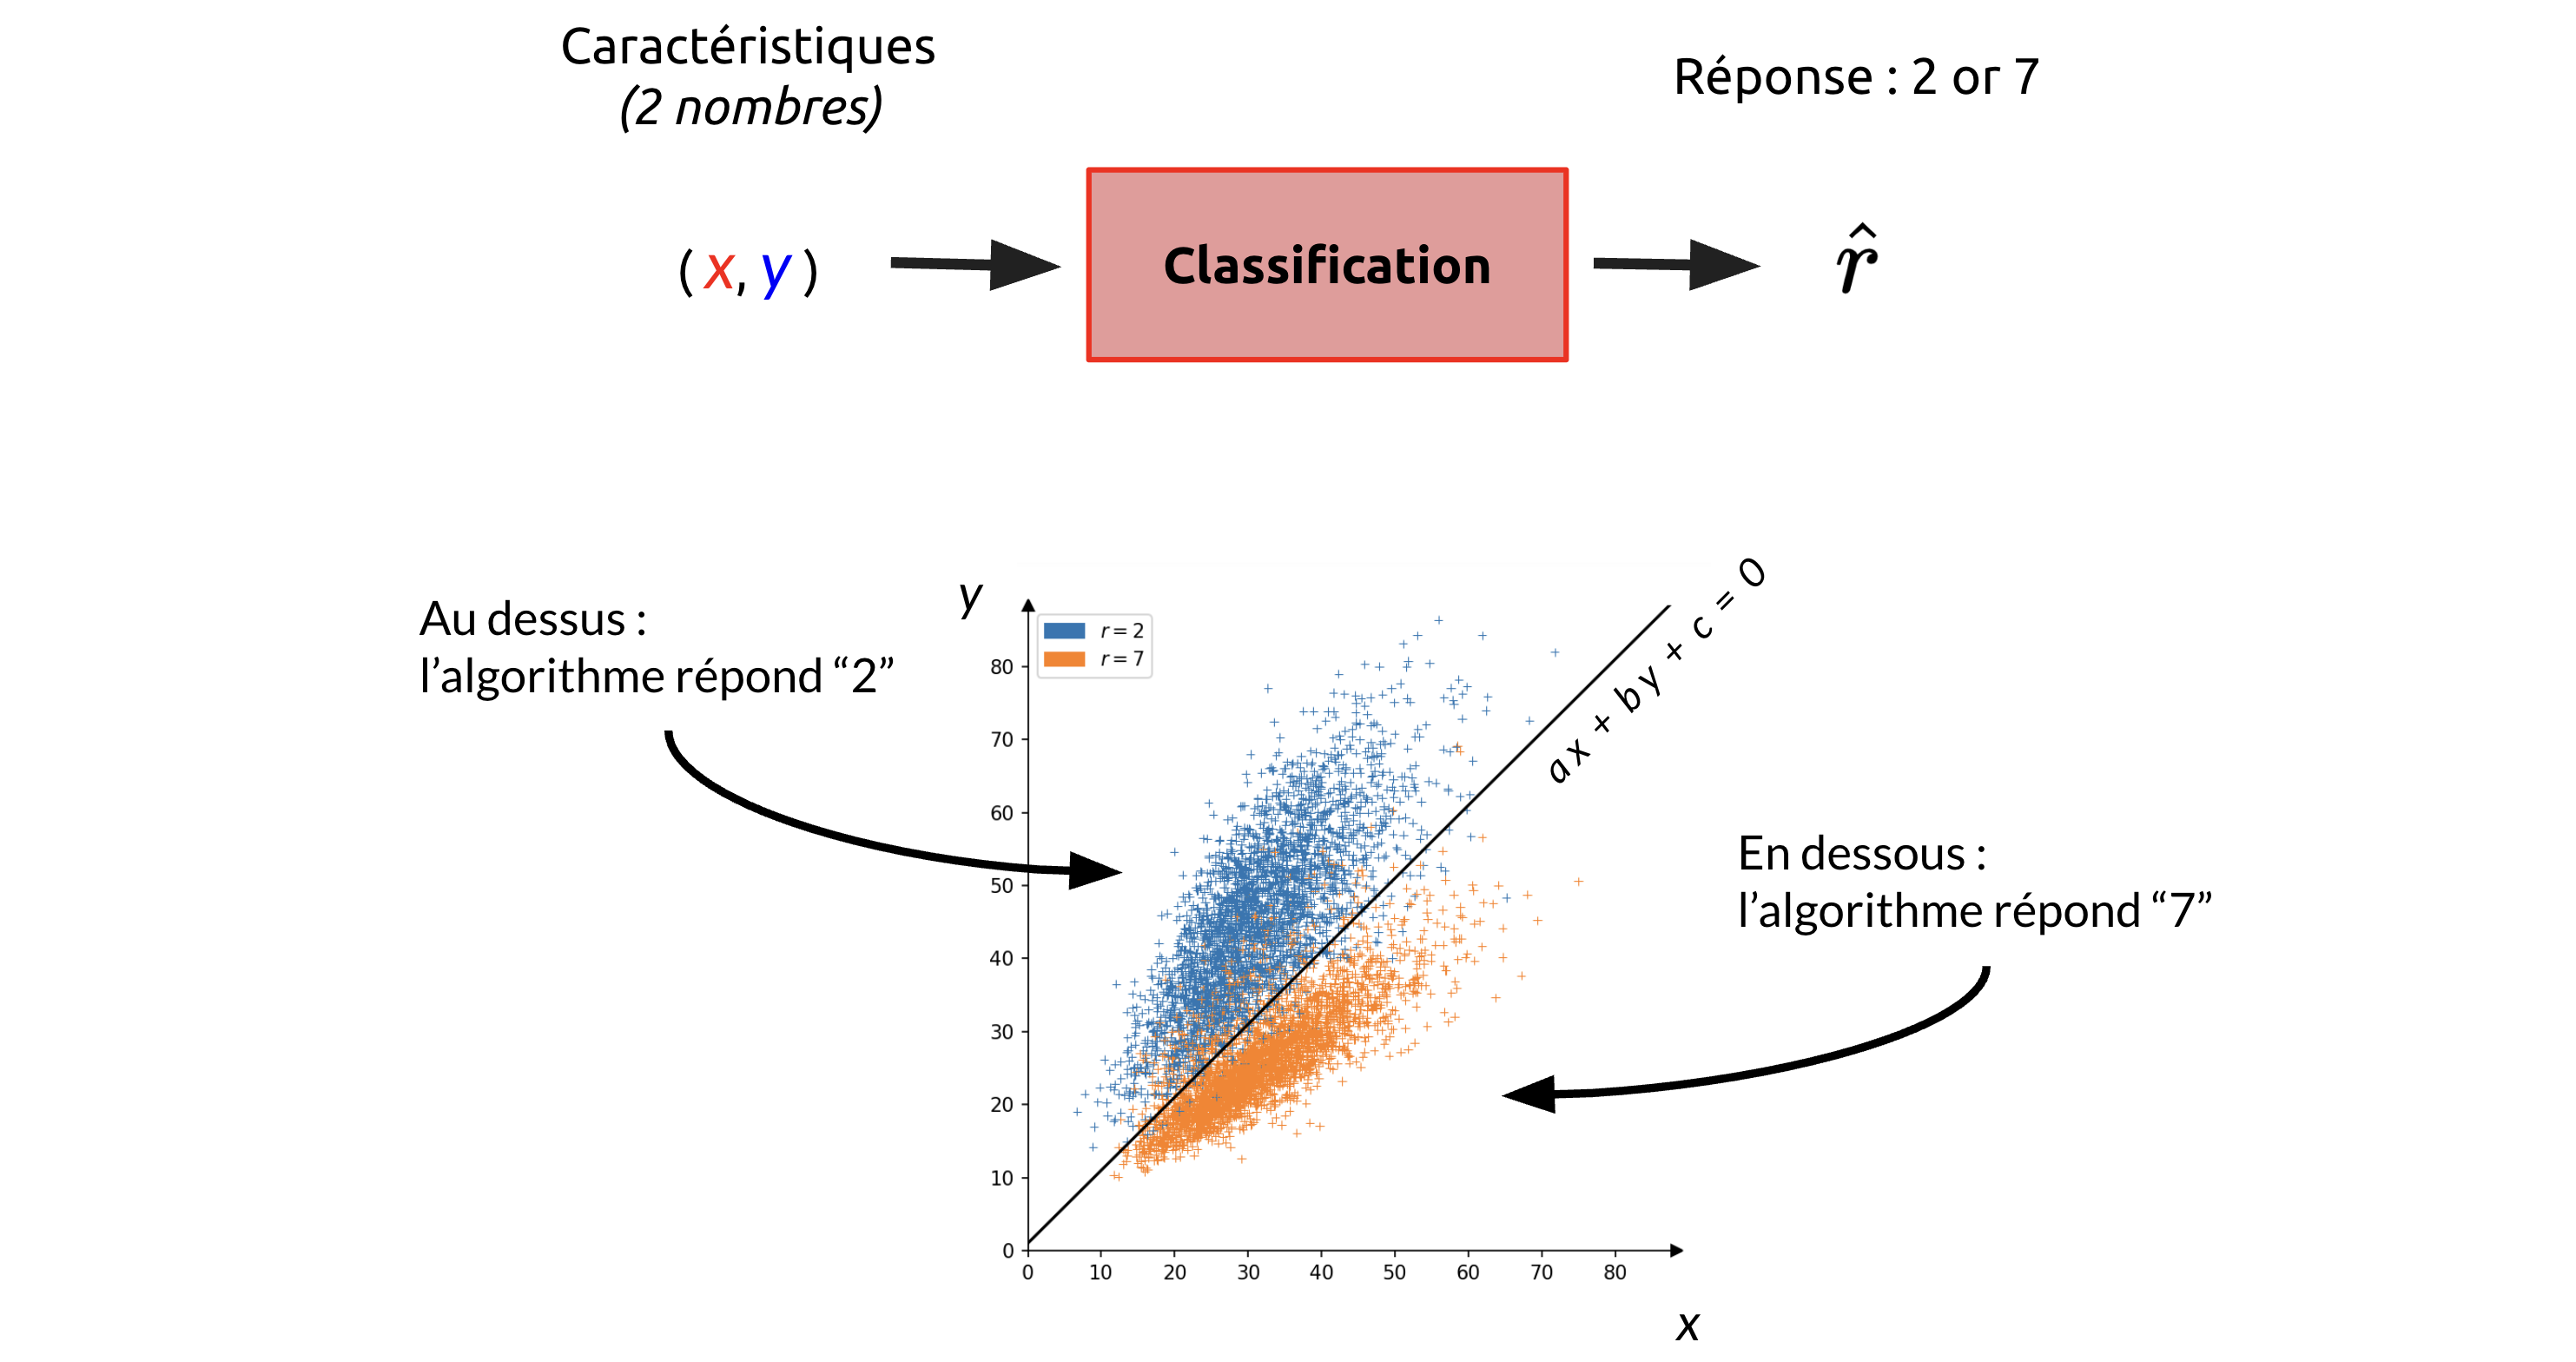  
!!!

!!! info Algorithme de classification  
La droite de classification permet de découper le plan en 2.  
- Les points au-dessus de la droite sont classés comme 2 par l'algorithme.  
- Les points en dessous de la droite sont classés comme 7 par l'algorithme.  
!!!

In [ ]:
tracer_10_points_droite()
validation_execution_10_points()

!!! question Quel est le pourcentage d'erreur sur ce schéma ?  
Calculez le pourcentage d'erreur pour ces 10 images et cette droite en sachant que les points au dessus de la droite sont classés comme 2 par l'algorithme et ceux en dessous comme des 7.  
**Remplacez les `...`** dans la cellule suivante par votre réponse (uniquement le nombre sans le %) **puis exécutez**.  
!!!

In [ ]:
erreur_10 = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_score_droite()

!!! info Découpage du plan par une droite  
En deux dimensions, on peut utiliser une droite pour séparer les points en deux groupes. Une équation cartésienne de la droite est de la forme  
$$ax + by + c= 0.$$  
Une droite peut être définie par un **vecteur directeur** $\vec{u} = \begin{pmatrix} u_{x} \\ u_{y} \end{pmatrix}$ et par un point $A$.  
**Exécutez la cellule suivante** pour voir le découpage par une droite sur les images.  
!!!

In [ ]:
tracer_points_droite_vecteur(directeur=True)
validation_execution_tracer_points_droite_vecteur()

!!! question Trouvez une droite permettant d'obtenir moins de 8% d'erreur  
Ajustez les paramètres $u_x$, $u_y$, $x_A$ et $y_A$ pour trouver une bonne droite séparatrice. Le pourcentage d'erreur est la proportion de points d'un groupe qui sont du mauvais côté de la droite.  
Quand vous aurez trouvé une bonne droite, **exécutez la cellule suivante** pour passer à la suite.  
!!!

In [ ]:
calculer_score_droite()

### Comment déterminer la position d'un point par rapport à la droite ?
!!! abstract Comment l'ordinateur fait-il pour savoir si un point est au dessus de la droite ?  
L'ordinateur ne peut pas faire de comparaison visuellement. Il doit donc faire des calculs avec les coordonnées des points et l'équation de la droite.  
!!!
#### Introduction du vecteur normal 

!!! quote Propriété   
Un vecteur normal de la droite d'équation $ ax+by+c=0 $ est $\vec{n} = \begin{pmatrix} a \\ b \end{pmatrix}$.  
!!!
!!! question Coordonnées d'un vecteur normal $\vec{n}$  
Lisez les valeurs de $a$ et $b$ dans l'équation de la figure ci-dessus, et **remplacez les `...`** dans la cellule suivante par les bonnes valeurs de $\vec{n}$ **puis exécutez**.  
!!!

In [ ]:
n = ( ... , ... )


# NE PAS MODIFIER LA LIGNE EN-DESSOUS
validation_question_decouverte_vecteur_normal()

!!! question Produit scalaire $\vec{n} \cdot \vec{u}$  
Calculez le produit scalaire $\vec{n} \cdot \vec{u}$. On rappelle que $\vec u$ est le vecteur directeur défini sur la figure ci-dessus.  
!!!

In [ ]:
produit_scalaire_n_u = ... 


# NE PAS MODIFIER LA LIGNE EN-DESSOUS
validation_question_produit_n_u()

!!! info À partir de maintenant : classification grâce au vecteur normal $\vec n$  
Nous utiliserons à partir de maintenant le vecteur normal $\vec{n}$ pour déterminer si un point est au-dessus ou en dessous de la droite.  
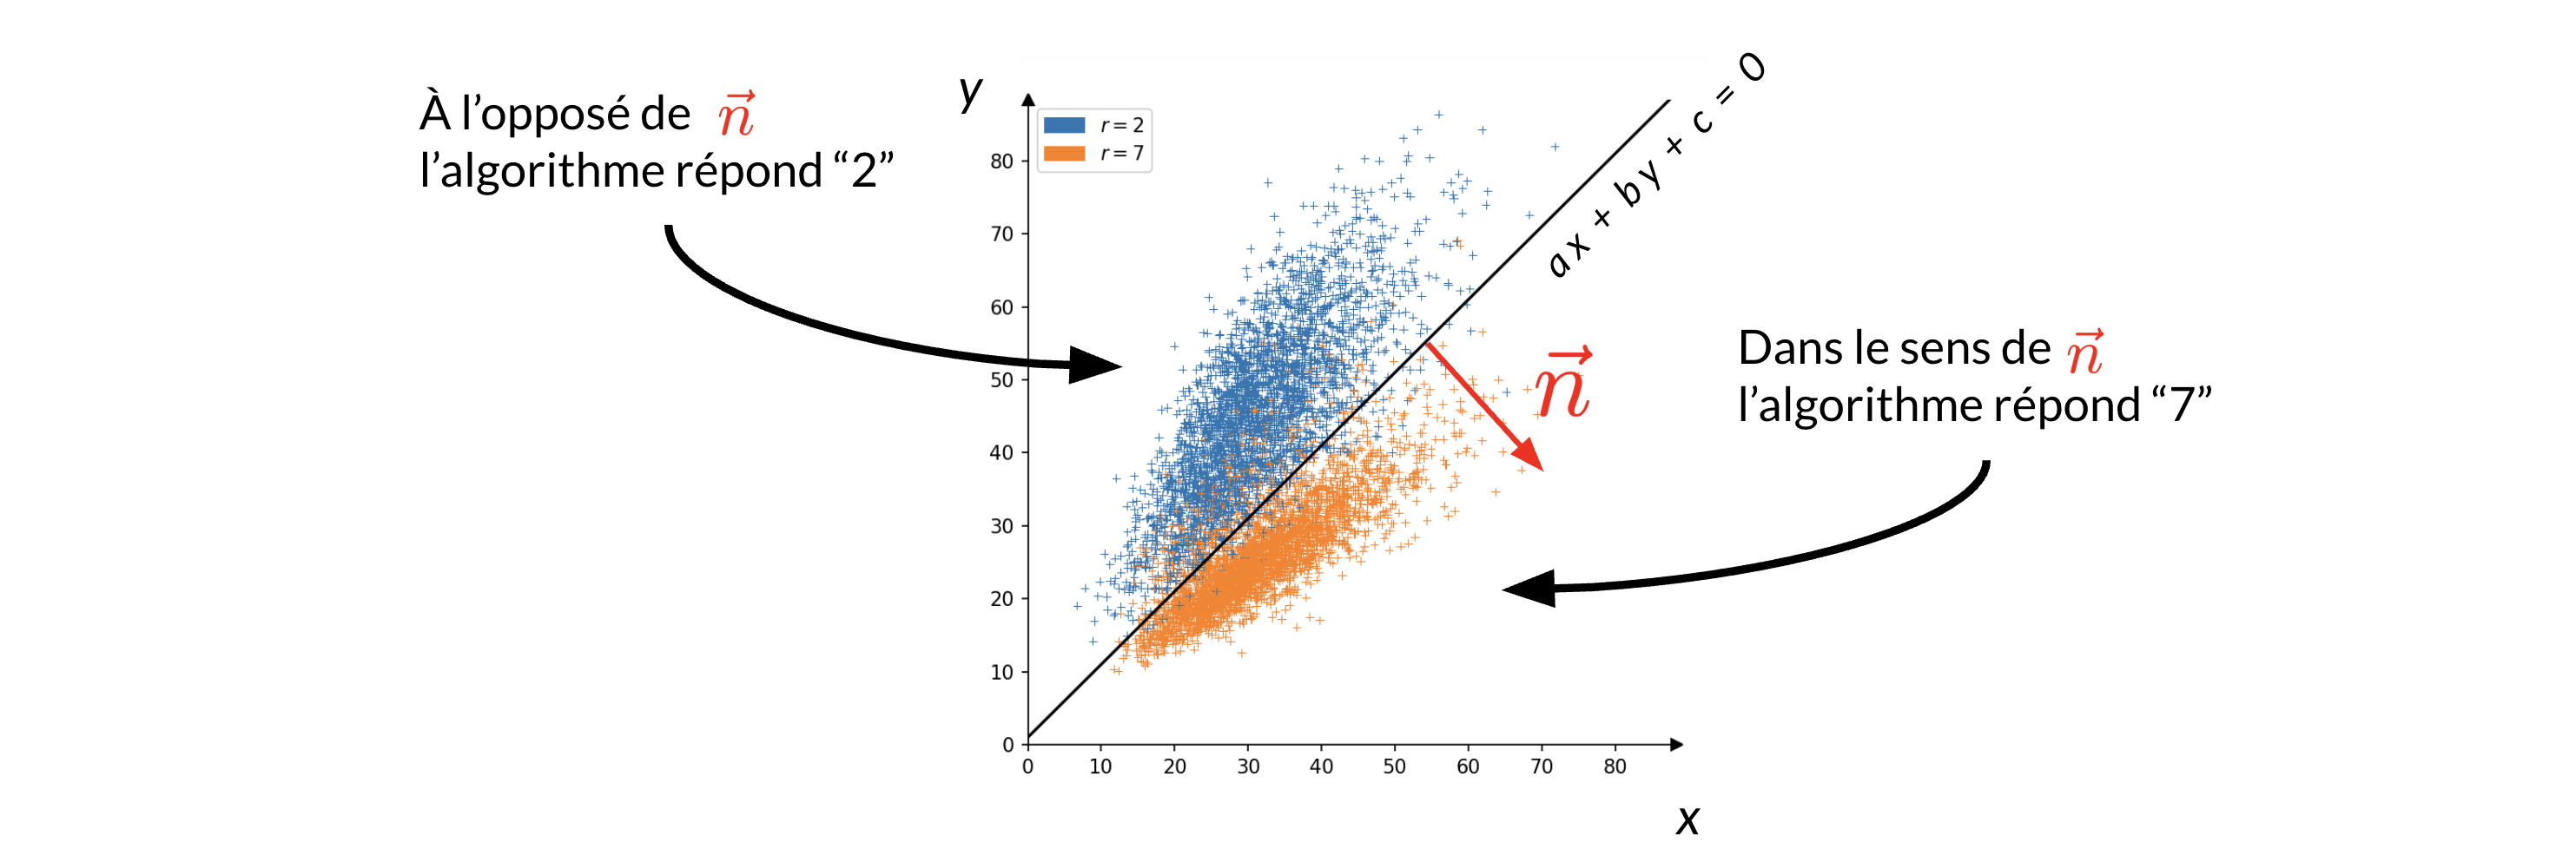  
!!!

In [ ]:
tracer_points_droite_vecteur(normal=True,reglage_normal=True,save=False)
validation_execution_tracer_points_droite_vecteur_2() 

!!! question Trouvez une droite permettant d'obtenir moins de 8% d'erreur  
Ajustez les paramètres $a$, $b$, $x_A$ et $y_A$ pour trouver une bonne droite séparatrice. Le pourcentage d'erreur est la proportion de points d'un groupe qui sont du mauvais côté de la droite.  
Quand vous aurez trouvé une bonne droite, **exécutez la cellule suivante** pour passer à la suite.  
!!!

In [ ]:
calculer_score_droite_normal()

!!! question Quelle classe correspond à la direction de $\vec{n}$ ?  
Dans la zone du plan où pointe le vecteur $\vec{n}$, quelle classe l'algorithme va-t-il répondre ?  
Remplacez les `...` dans la cellule suivante par 2 ou 7 **puis exécutez**.  
!!!

In [ ]:
# Réponses possibles : 2 ou 7
classe_sens_vecteur_normal = ...
classe_sens_oppose_vecteur_normal = ...

# NE PAS MODIFIER LA LIGNE EN-DESSOUS
validation_question_classe_direction_n()

#### Déterminer si un point est au dessus ou au dessous de la droite de classification

!!! info Produit scalaire, vecteur normal et direction  
$A$ est un point sur la droite  et $\vec{n} = \begin{pmatrix} a \\ b \end{pmatrix}$ un vecteur normal à la droite. Le point $M$ représente une image inconnue.  
Le signe du produit scalaire $\vec{n} \cdot \vec{{AM}}$ donne la position de $M$ par rapport à la droite.   
  
**Exécutez** la cellule ci-dessous pour visualiser le calcul du produit scalaire.  
!!!

In [ ]:
produit_scalaire_exercice()
validation_execution_produit_scalaire_exercice()

!!! question Quel est le produit scalaire $\vec n \cdot \vec{AM}$ pour $M(40, 30)$ ?  
Déplacez le point M et observez comment le produit scalaire change.  
Remplissez dans la cellule suivante la valeur du produit scalaire $\vec n \cdot \vec{AM}$ pour $M(40, 30)$.  
!!!

In [ ]:
produit_scalaire = ...

# NE PAS MODIFIER LA LIGNE EN-DESSOUS
validation_question_produit_scalaire()

!!! question Quel est le produit scalaire $\vec n \cdot \vec{AM}$ pour $M(25, 35)$ ?<details><summary>  
 Calculez à la main le produit scalaire $\vec n \cdot \vec{AM}$ pour $M(25, 35)$ et **remplacez les `...` dans la cellule suivante par sa valeur**.  
Besoin d'aide ? Clique ici  </summary> Il y a deux étapes : 1) Calculer les coordonnées du vecteur $\vec{AM}$.  2) Appliquer la formule du produit scalaire.</details>  
!!!

In [ ]:
produit_scalaire = ...

# NE PAS MODIFIER LA LIGNE EN-DESSOUS
validation_question_produit_scalaire_2()

!!! tip Appliquons ce qu'on vient de travailler au cas de nos images  
**Exécutez la cellule suivante** pour visualiser de nouveau les nuages de points et la droite.  
!!!

In [ ]:
tracer_points_droite_vecteur(normal=True,reglage_normal=True)
validation_execution_tracer_points_droite_vecteur_3()

!!! info Une image est représentée par le point $M(40,20)$. Est-ce une image de 2 ou de 7 ?   
Il est possible de regarder le graphique pour avoir la réponse. Nous voulons ici obtenir la réponse par le calcul comme l'ordinateur :   
- Calculer les coordonnées du vecteur $\vec{AM}$  
- Calculer le produit scalaire $\overrightarrow{n}\cdot \overrightarrow{AM}$  
- En déduire où est le point $M$ par rapport à la droite  
!!!

!!! question Étape 1 :  Calculez les coordonnées du vecteur $\vec{AM}$  
**Remplacez les `...`** dans la cellule suivante par les bonnes valeurs **puis exécutez**.  
!!!

In [ ]:
x_M = ...
y_M = ...
x_A = ...
y_A = ...
vecteur_AM = ( ... , ... )

# NE PAS MODIFIER LA LIGNE EN-DESSOUS
validation_question_normal_2a()

!!! question Étape 2 :  Calculez le produit scalaire $\overrightarrow{n}\cdot \overrightarrow{AM}$   
**Remplacez les `...`** dans la cellule suivante par les bonnes valeurs **puis exécutez**.  
!!!

In [ ]:
produit_scalaire_n_AM = ...

# NE PAS MODIFIER LA LIGNE EN-DESSOUS
validation_question_normal_2b()

!!! question Étape 3 : Où est M ?   
 Si le produit scalaire $\overrightarrow{n}\cdot \overrightarrow{AM}$ est positif $M$ est du côté où $\overrightarrow{n}$ pointe.  
 Si le produit scalaire est négatif $M$ est de l'autre côté.  
Sinon $M$ est sur la droite  
  
**QCM** Dans ce cas le point $M$ est...  
- A) du côté où pointe $\vec n$  
- B) de l'autre côté  
- C) sur la droite  
**Remplacez les `...`** dans la cellule suivante par **A**, **B** ou *C** pour indiquer la bonne réponse.  
!!!

In [ ]:
# Répondre au QCM par 'A', 'B' ou 'C'
reponse = ...

# NE PAS MODIFIER LA LIGNE EN-DESSOUS
validation_question_normal_2c()

!!! question Conclure sur la classe de l'image  
Déduire de la réponse précédente la classe du point $M$.  
!!!

In [ ]:
# Répondre par 2 ou 7 
classe_de_M = ...

# NE PAS MODIFIER LA LIGNE EN-DESSOUS
validation_question_normal_2d()

## Essayons de trouver 2 meilleures caractéristiques !

!!! tip Nouvelles zones de l'image  
**Exécutez la cellule suivante** pour voir les nouvelles zones de l'image que nous avons choisies.  
!!!

In [ ]:
affichage_zones_custom_2(A_1, B_1, A_2, B_2)
validation_execution_def_caracteristiques_ripou()

!!! question Pour la zone rouge quelle image aura la moyenne de niveau de gris la plus élevée ?  
Remplacez les `...` dans la cellule suivante par 2 ou 7.  
!!!

In [ ]:
reponse = ...

# NE PAS MODIFIER LA LIGNE EN-DESSOUS
validation_question_2cara_comprehension()

!!! tip Modifier les caractéristiques  
En changeant les zones on modifie les caractéristiques. On peut ainsi améliorer la classification des images.   
 **Exécute la cellule suivante** pour voir la position dans le plan des images et règle la droite de classification pour atteindre 11% d'erreur.   
!!!

In [ ]:
affichage_zones_custom_2(A_1, B_1, A_2, B_2,normal=True,trace=True)

In [ ]:
# Executer la fonction suivante pour valider la question quand ton score est sous 11%
calculer_score_custom_droite_2cara()

!!! question Changer les zones choisies pour définir vos propres caractéristiques  
**Exécutez la cellule suivante** puis sélectionnez deux zones sur l'image. Les caractéristiques $x$ et $y$ seront la moyenne des pixels dans chacune des zones.  
Cliquez sur le bouton zone1 ou zone2 pour choisir la zone à sélectionner, puis cliquez sur l'image et laissez appuyé jusqu'à avoir selectionné la zone souhaitée.  
!!!

!!! warning SOS <details> <summary>Rien ne se passe ? Clique ici  </summary>  
 Avec la souris sélectionne une zone dans une des images :   
-clique sur zone 2    
-sélectionne une zone   
-clique sur zone 1  
-selectionne une zone  
  
 L'enjeu est de trouver des zones permettant de différencier les 2 et les 7.  </details>  
!!!

In [ ]:
afficher_customisation()
validation_execution_caracteristiques_custom()

!!! question Trouvez la meilleure droite  
Ajustez les paramètres $a$, $b$, $x_A$ et $y_A$ pour trouver une bonne droite séparatrice. Le pourcentage d'erreur est la proportion de points d'un groupe qui sont du mauvais côté de la droite.  
**Exécutez la cellule suivante** pour passer à la suite quand vous aurez moins de 6% d'erreur. Il faut pour ça trouver deux bonnes zones et ajuster la droite.  
!!!

In [ ]:
calculer_score_custom_droite()

!!! abstract Fin du Notebook  
Dans ce TP, vous avez :   
  
- Utilisé deux caractéristiques pour chaque image.  
- Placé les images dans un plan en utilisant ces deux valeurs comme coordonnées.  
- Utilisé une droite pour séparer les points en deux groupes.  
- Optimisé les paramètres de la droite pour minimiser votre erreur.  
  
Continuez à chercher des bonnes zones pour diminuer votre pourcentage d'erreur. Vous pouvez faire jusqu'à moins de 3% d'erreur !  
!!!